In [1]:
import pandas as pd
Churn = pd.read_csv("Churn_Modelling.csv")

In [2]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt #or: from matplotlib import pyplot as plt

<Axes: xlabel='Age', ylabel='CreditScore'>

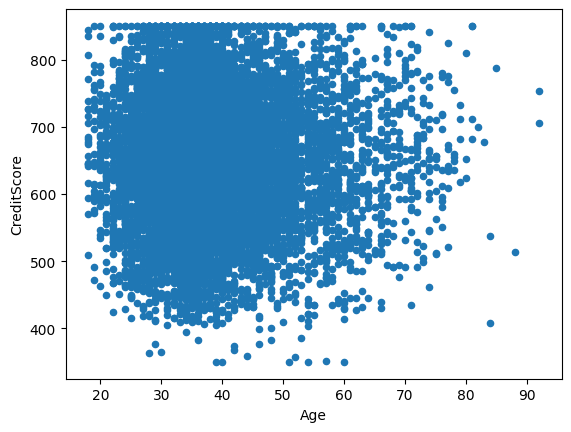

In [5]:
#scatter plot with pandas
Churn.plot.scatter(x="Age", y = "CreditScore")

<Axes: xlabel='Age', ylabel='CreditScore'>

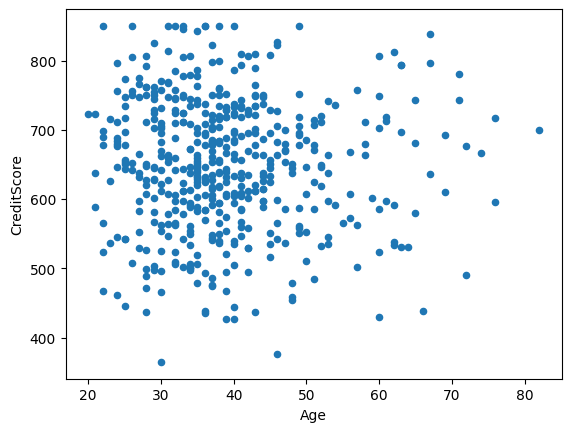

In [6]:
#taking random sample then plot
Churn.sample(500).plot.scatter(x='Age',y='CreditScore')

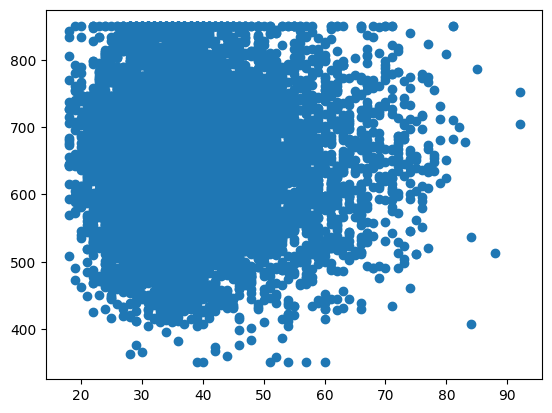

In [7]:
#without pandas here you have to create separate variable to store sample size data and then use plt
plt.scatter(x=Churn['Age'], y = Churn['CreditScore'])

In [21]:
Churn_avg_age = Churn.groupby('Age')[['HasCrCard', 'NumOfProducts', 'Tenure']].mean().reset_index()

In [22]:
Churn_avg_age

,Age,HasCrCard,NumOfProducts,Tenure
0,18,0.636364,1.500000,4.818182
1,19,0.814815,1.370370,5.074074
2,20,0.650000,1.550000,5.075000
3,21,0.716981,1.660377,4.773585
4,22,0.690476,1.523810,5.678571
...,...,...,...,...
65,83,0.000000,1.000000,6.000000
66,84,0.500000,1.000000,8.000000
67,85,1.000000,2.000000,10.000000
68,88,1.000000,2.000000,10.000000


<Axes: xlabel='Age'>

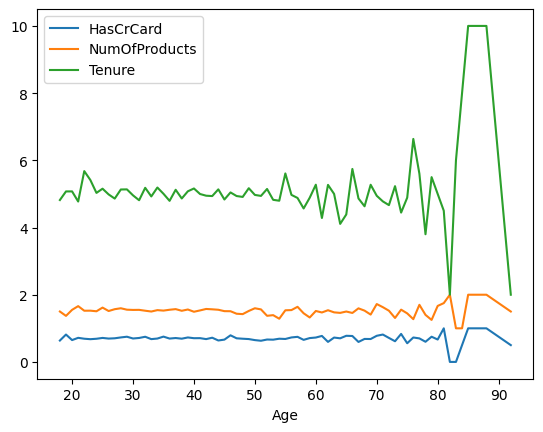

In [23]:
Churn_avg_age.plot.line(x='Age')

Text(0, 0.5, 'cards')

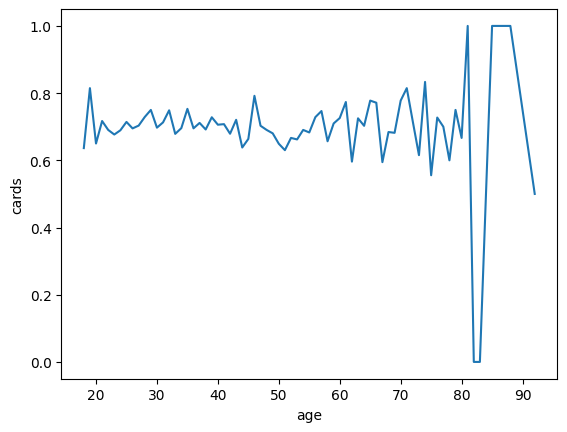

In [11]:
plt.plot(Churn_avg_age["Age"], Churn_avg_age["HasCrCard"])
plt.xlabel("age")
plt.ylabel("cards")

In [12]:
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

<Axes: xlabel='Age', ylabel='HasCrCard'>

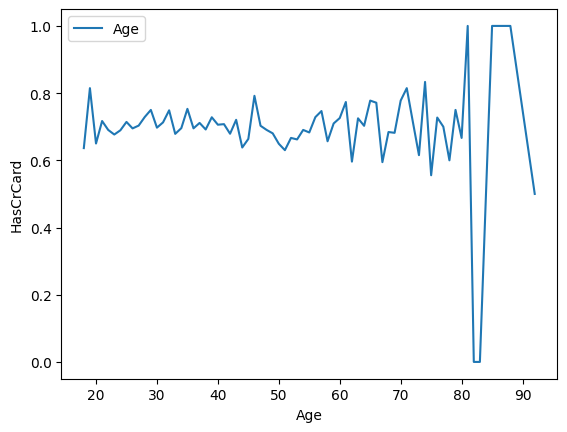

In [13]:
sns.lineplot(data = Churn_avg_age, x = 'Age', y = 'HasCrCard', label = "Age")

In [25]:
Churn_avg_sal = Churn.groupby('Gender')[['EstimatedSalary']].mean().reset_index()
Churn_avg_sal

,Gender,EstimatedSalary
0,Female,100601.541382
1,Male,99664.576931


<Axes: xlabel='Gender'>

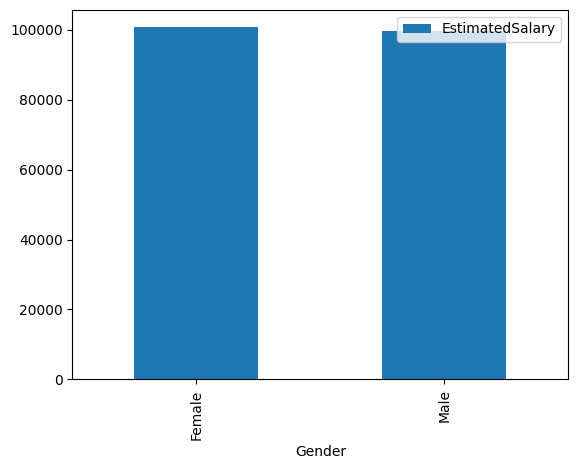

In [26]:
Churn_avg_sal.plot.bar(x = "Gender", y = "EstimatedSalary")

<Axes: ylabel='Gender'>

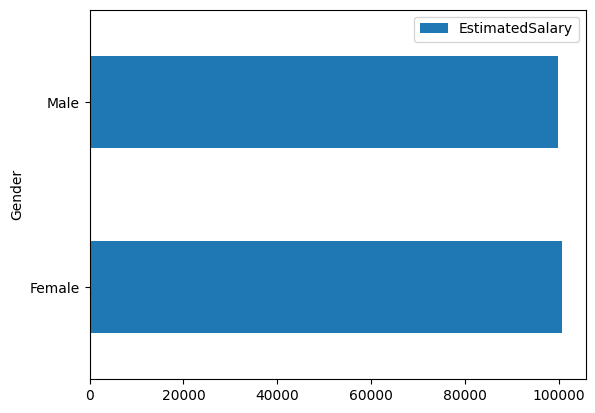

In [28]:
Churn_avg_sal.plot.barh(x = "Gender", y = "EstimatedSalary") # Horizontal bar plot in pandas

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

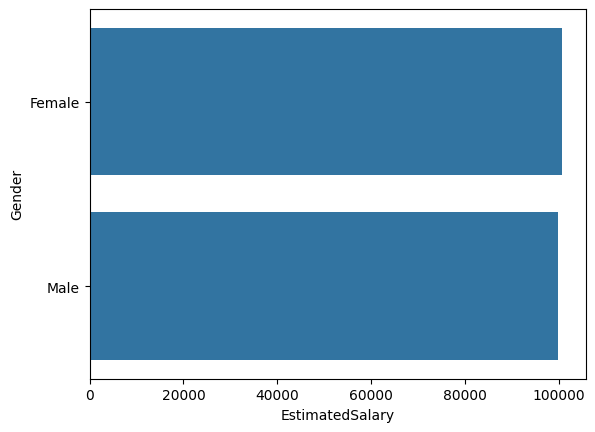

In [30]:
sns.barplot(data = Churn_avg_sal, y = 'Gender', x = 'EstimatedSalary')

In [14]:
Churn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       5457.])

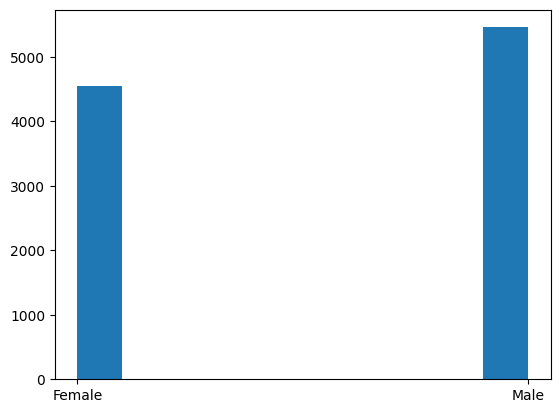

In [15]:
values, bin_edges, patches = plt.hist(Churn['Gender'])
values

In [16]:
# 3D plotting using pandas

In [18]:
Churn["GenderColor"] = Churn["Gender"].apply( lambda x : "green" if x == "Male" else "pink")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

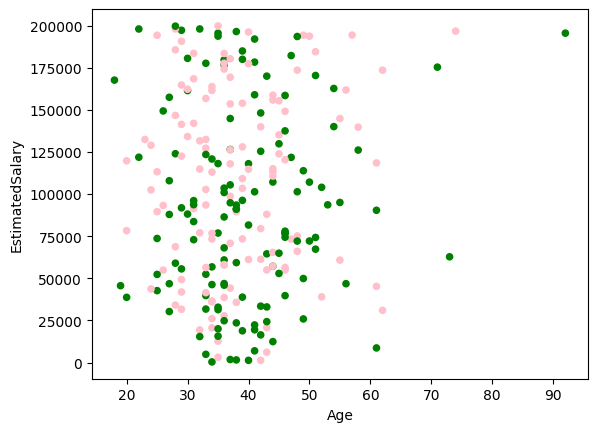

In [21]:
Churn.sample(250).plot.scatter( x = "Age", y = "EstimatedSalary", c = "GenderColor")

In [22]:
# Using matplotlib

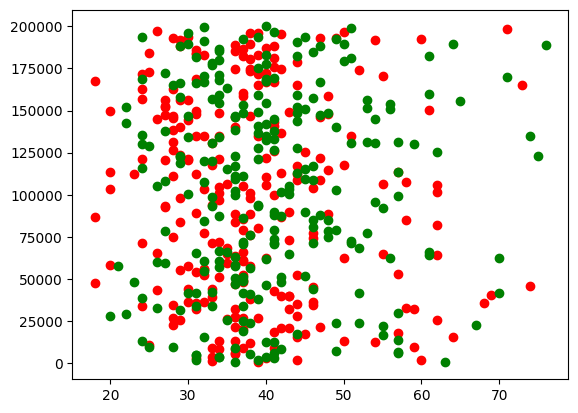

In [28]:
for g in ["Male", "Female"]:
    c = "red" if g == "Male" else "green"
    g_churn = Churn[Churn["Gender"] == g].sample(250)
    plt.scatter(x = g_churn["Age"], y = g_churn["EstimatedSalary"], color = c)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

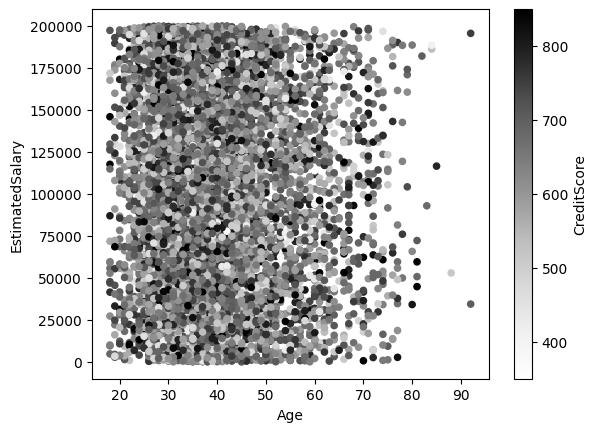

In [36]:
Churn.plot.scatter(x='Age', y = 'EstimatedSalary', c = 'CreditScore') # Passing a continious range to color feature in pandas

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

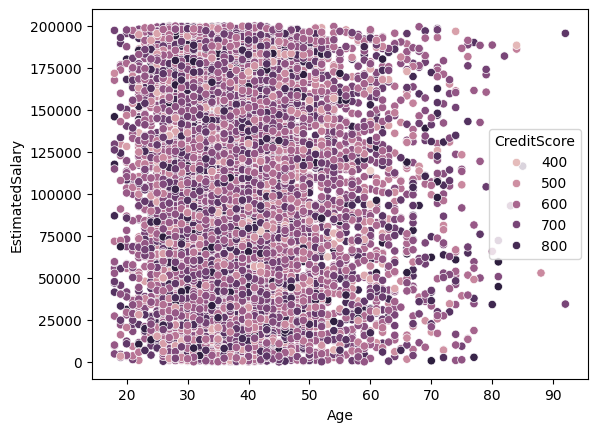

In [37]:
sns.scatterplot(data = Churn, x = 'Age', y = 'EstimatedSalary', hue = 'CreditScore') # Using seaborn

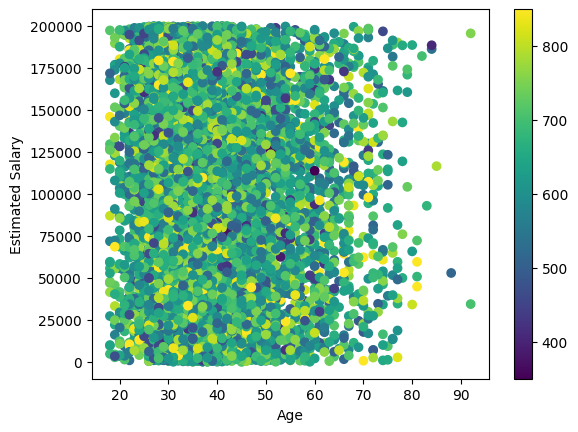

In [46]:
mat_scatterPlot = plt.scatter(x = Churn['Age'], y = Churn['EstimatedSalary'], c = Churn['CreditScore']) # Using matplotlib
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.colorbar(mat_scatterPlot)

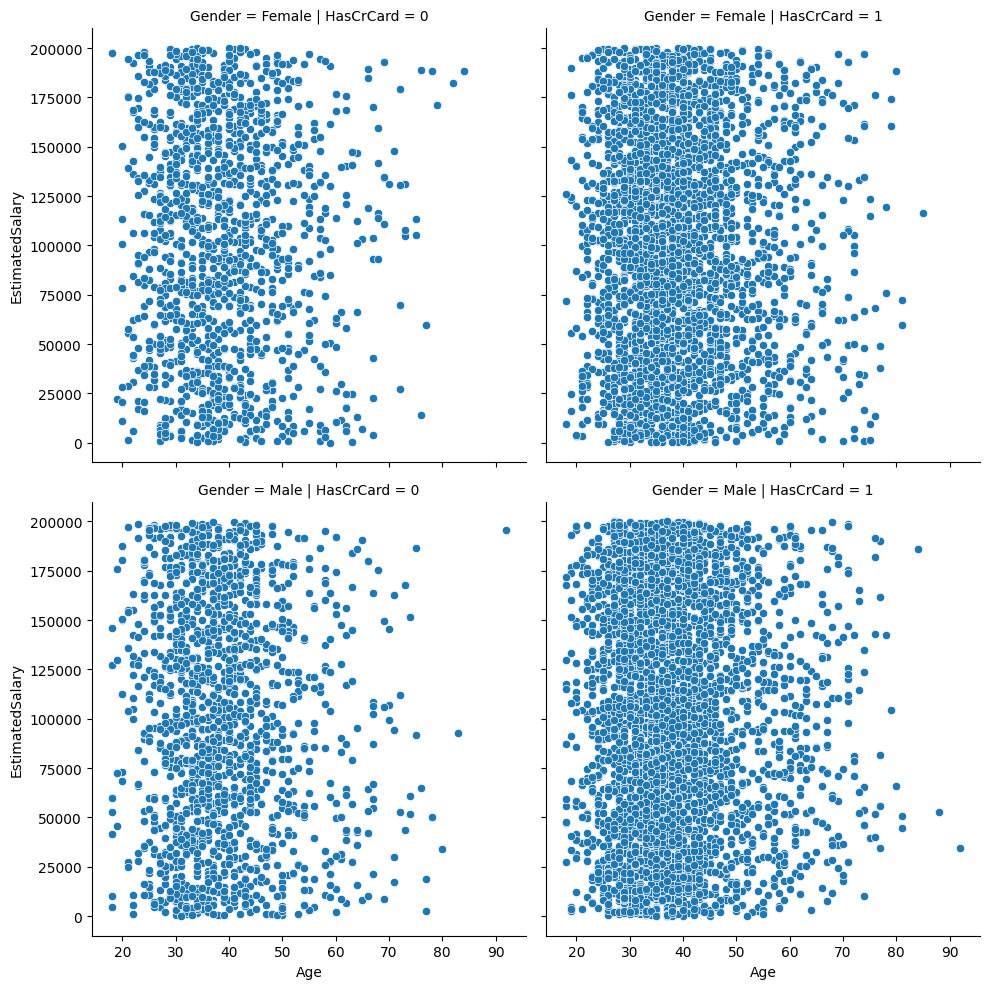

In [48]:
# Starting Multiplots
sns.relplot(data = Churn, x = 'Age', y = 'EstimatedSalary', row = 'Gender', col = 'HasCrCard')

In [50]:
sns.relplot(data = Churn, x = 'Age', y = 'EstimatedSalary', row = 'Gender', col = 'HasCrCard', kind = 'bar')

ValueError: Plot kind bar not recognized